# Using AffinityPropagation Clustering Algorithm with predefined data from multiple Metrics

This code combines Geolocation Data with a predefined distance matrix as input to the Affinity Clustering Algorithm

In [32]:
# Enable inline plotting in notebook (rather than Plotting to separate window)
%matplotlib inline

#Plotting Packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import numpy as np
import scipy as sp
import math

#Sklearn Packages
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing
from sklearn.cluster import KMeans, SpectralClustering, AffinityPropagation, affinity_propagation

#Scipy Packages
from scipy.sparse import * 
import scipy.sparse as ss
from pprint import pprint

# Import Data

## Import Geographic Data

In [36]:
# Set the path to the data files - change this to where you store your files
analysisPath = 'C:/Clustering/'

In [37]:
# Define the input filename
input_file = analysisPath + "LatLong_data.csv"

# Read the csv files into dataframes
df_latlong = pd.read_csv(input_file,low_memory=False)

In [38]:
print(df_latlong.head(5))

     Country  latitude  longitude  Node
0  Australia -37739625  145003594  PNND
1  Australia -37694450  145024870  KPBD
2  Australia -37720293  144984804  CNBD
3  Australia -37734323  144906185  ENBD
4  Australia -37752300  144935000  BWCG


## Import predefined Similarity Matrix

In [39]:
# Define the input filename - format is Node1 Node2 Similarity_Metric
input_file = analysisPath + "similarity_matrix.csv"

# Read the csv files into two dataframes
df_similarity = pd.read_csv(input_file,low_memory=False)

In [40]:
print(df_similarity.head(5))

      X     Y  Similarity_Metric
0  ANYG  BSVZ                  4
1  ANYG  BSVZ                  9
2  ANYG  BWKD                178
3  ANYG  BKQR                  5
4  ANYG  BKQR                 25


### Create COO Matrix from Similarity Matrix

In [41]:
# Create COO Matrix from this Data
# Clustering Algorithm won't accept strings as input, so convert NodeNames to NodeNumbers
# Relationships may be duplicated - need to collate and combine
rowNNames = df_similarity['X'].tolist()
colNNames = df_similarity['Y'].tolist()
allNNames = rowNames + colNames

# Create Unique List of Node names
NNamesSet = sorted(list(set(allNNames)))

In [42]:
print(sorted(NNamesSet))
print(len(NNamesSet))

['ANAL', 'ANYG', 'AVBD', 'AVSD', 'AVWD', 'BEZG', 'BFDL', 'BKGD', 'BKQR', 'BKZC', 'BLLD', 'BLSD', 'BLWD', 'BLYD', 'BMBD', 'BSVZ', 'BUAD', 'BUBD', 'BWCG', 'BWGO', 'BWKD', 'BWXL', 'BYDD', 'CBDD', 'CBXD', 'CDHD', 'CDHU', 'CEZG', 'CIYC', 'CLHD', 'CNBD', 'CQAD', 'CTBD', 'CTDD', 'CWGV', 'CWTG', 'DLLS', 'DNXD', 'DOWX', 'DUEN', 'EAGD', 'EJLD', 'EKBD', 'ELBD', 'EMBD', 'EMHO', 'ENBD', 'ESBD', 'ESGL', 'ESSD', 'EWTG', 'EYAD', 'FAFD', 'FAWT', 'FETG', 'FGFD', 'FIWD', 'FKAR', 'FNBD', 'FNZC', 'FRCD', 'FRUV', 'FSUD', 'FTAP', 'GBND', 'GDBD', 'GLZD', 'GRZW', 'GSBZ', 'GTED', 'GWEG', 'GWNG', 'GYBD', 'HDLD', 'HDND', 'HEER', 'HEUV', 'HGAM', 'HTFD', 'IVBD', 'KEQG', 'KNCD', 'KPBD', 'KSHG', 'KWBD', 'KWCD', 'KWSD', 'KWWD', 'LATD', 'LAYO', 'LLOD', 'MECD', 'MFSD', 'MLBD', 'MMOD', 'MPOD', 'MTPD', 'MVFP', 'MXDD', 'NCER', 'NEJE', 'NLDD', 'NMBD', 'NMCD', 'NMWD', 'NMYN', 'NOBD', 'NSFD', 'OAQG', 'OUNA', 'PAFG', 'PAZD', 'PCBD', 'PCNX', 'PHRL', 'PNND', 'PPBD', 'PRBD', 'PRXJ', 'PRYW', 'PWBD', 'RESD', 'REZG', 'RLCZ', 'RNBD',

In [43]:
# Combine data into a dictionary of NodeName, NodeNumber
NNamesDict = {}

for i in range(0,len(NNamesSet)):
    key = NNamesSet[i]
    NNamesDict[key] = i
#pprint(NNamesDict)

# Recreate dataset as NodeNumbers
rowNNumber = []
colNNumber = []
for i in range(0,len(rowNNames)):
    rowNNumber.append(NNamesDict[rowNNames[i]])
    colNNumber.append(NNamesDict[colNNames[i]])

In [44]:
# Convert format to COO Matrix: Row, Column, Value
smetric = np.array(df_similarity['Similarity_Metric'])
smetric.astype(float)
S = ss.coo_matrix((smetric, (rowNNumber, colNNumber)), shape=(len(NNamesSet), len(NNamesSet)))
print(S.shape)
print(S)

(151, 151)
  (1, 15)	4
  (1, 15)	9
  (1, 20)	178
  (1, 8)	5
  (1, 8)	25
  (1, 9)	4
  (1, 9)	38
  (1, 93)	15
  (1, 93)	8
  (1, 20)	135
  (1, 20)	170
  (1, 18)	7
  (1, 35)	7
  (1, 93)	172
  (6, 73)	72
  (6, 73)	52
  (6, 101)	18
  (6, 106)	40
  (6, 117)	115
  (6, 124)	6
  (6, 119)	18
  (6, 131)	1
  (6, 52)	6
  (6, 65)	8
  (6, 73)	406
  :	:
  (134, 115)	41
  (134, 118)	282
  (134, 118)	172
  (134, 118)	7
  (134, 120)	28
  (134, 122)	7
  (134, 132)	35
  (134, 132)	46
  (134, 133)	89
  (134, 133)	251
  (134, 134)	9
  (134, 134)	419
  (141, 101)	10
  (141, 106)	80
  (141, 117)	11
  (141, 134)	15
  (141, 106)	106
  (141, 117)	37
  (141, 134)	17
  (141, 52)	19
  (141, 106)	260
  (141, 117)	13
  (141, 134)	5
  (141, 0)	2
  (141, 99)	88


## Combine Matrices

### First make sure both Matrices are based on same data

In [45]:
## Remove Nodes that aren't in the Similarity Matrix
dropNode = [r for r in df_latlong['Node'] if r not in namesSet]
print(dropNode)

['HOED', 'ZOAX', 'XVBD', 'HQPM', 'VCCL', 'CGEL']


In [46]:
df_latlong = df_latlong[~df_latlong['Node'].isin(dropNode)]
print(df_latlong.shape)

(151, 4)


In [47]:
df_latlong = df_latlong.sort_values(by=('Node'), ascending=True)
print(df_latlong.head(5))

       Country  latitude  longitude  Node
32   Australia -37781003  145031668  ANAL
108  Australia -37762800  144962000  ANYG
74   Australia -37766300  144924000  AVBD
98   Australia -37777800  144930000  AVSD
100  Australia -37777100  144906000  AVWD


### Convert Lat Long Matrix to Similarity CSR Format

In [60]:
# Latitude and Longitude values need to be converted
df_latlong['Lat'] = df_latlong['latitude'].apply(lambda x: x/1000000)
df_latlong['Long'] = df_latlong['longitude'].apply(lambda x: x/1000000)

In [61]:
# Lat Long Matrix is currently in Samples x Features format
df_LL = df_latlong[['Lat','Long']]

In [62]:
# Create Euclidean Distance Matrix from Lat Long Matrix
LL_dist = euclidean_distances(df_LL, df_LL)    #ll_distances is in matrix form

In [63]:
print(LL_dist.shape)

(151, 151)


In [64]:
# Convert Euclidean Distance matrix to CSR Format
LLcsr = ss.csr_matrix(LL_dist)  #Convert to csr before normalizing
#print(L)

In [65]:
# Normalise Data
LLcsr_norm = preprocessing.normalize(LLcsr, norm='l2')

In [88]:
# Convert to Similarity Matrix
O = np.ones(LLcsr_norm.shape)
Ocsr = ss.csr_matrix(O)
LLcsr_sim = Ocsr - LLcsr_norm

### Convert Similarity Metric Matrix to CSR Format

In [89]:
Scsr = S.tocsr()
Scsr_norm = preprocessing.normalize(Scsr, norm='l2')

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


### Combine Data by summing Matrices

In [94]:
Ccsr = Scsr_norm + LLcsr_sim

## Affinity Clustering

In [95]:
Sim_matrix = Ccsr.toarray()

In [117]:
# Setup Affinity Propagation
AP = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='precomputed', verbose=False)
af = AP.fit(Sim_matrix)

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

clusterCount = len(cluster_centers_indices)
print(clusterCount)

21


### Print Cluster Label results

In [118]:
print(labels)

[19  1  0  0  0  7  8 12  0  1  9  2  2  2  7  1  2 12 13  1  1  2  3  7 13
  6 15  6 17  6  3 13  6  6  0  1  7  4  4  4  9  5  2 20  6  6  5  5 13  5
  5  5  6 19 13  6 17  6  7  7 15 10 10 13 10 20 19  8  2 20  2  7  8  8  9
  9 10  9  9  8 19 10  2  3 19 19 19 19 17 12  7  3 17  1  1 20  0 17 17  9
 18 10 16 11 11 11 11  6 18  5 12 10 13 15 14 15 14 15 18 14 16  3  3  3 10
  9  3  3  7  2 17 20 18 16 18 18  3 12  4  4  4 11 18  9  9 19  4 20 17 20
 17]


### Output results

In [119]:
df_Af = pd.DataFrame({'Name':namesSet,'Cluster':labels.tolist(),'Lat':df_latlong['Lat'],'Long':df_latlong['Long'],'Country':'Australia'})

In [120]:
outputfile='C:/Clustering/AffinityClustering.csv'
df_Af.to_csv(outputfile,index=False)

### Plot Results

In [121]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 5)
print(len(colors))

140


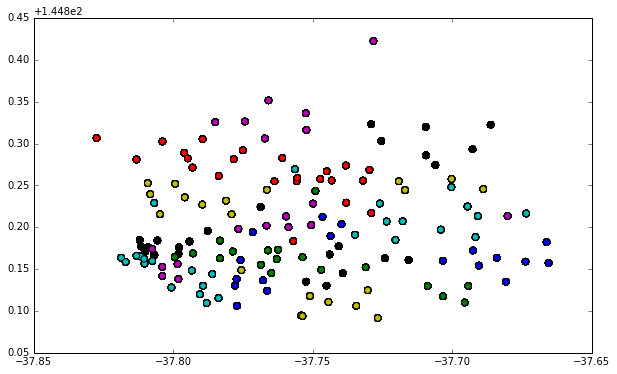

In [122]:
plt.figure(figsize=(10, 6))
for i in range(len(labels)):
    plt.scatter(df_Af['Lat'], df_Af['Long'], s=40, c=colors[df_Af['Cluster']])
plt.show()